In [3]:
%%sh
## Dependencies
pip install tqdm

  Using cached https://files.pythonhosted.org/packages/4a/1c/6359be64e8301b84160f6f6f7936bbfaaa5e9a4eab6cbc681db07600b949/tqdm-4.45.0-py2.py3-none-any.whl


You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
%load_ext autoreload
%autoreload 2

# helper python file
import ml_pipeline as pipeline
from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd

Using TensorFlow backend.


In [2]:
# read the data
(train_df,test_df)=pipeline.read_input_data()
(seq_test,seq_train,word_index)=pipeline.tokenize_data(test_df,train_df)
label_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y_train = train_df[label_names].values

  2%|▏         | 3670/153164 [00:00<00:04, 36696.80it/s]

num train:  159571
num test:  153164
pre-processing train data...


100%|██████████| 159571/159571 [00:04<00:00, 34876.64it/s]


tokenizing input data...
dictionary size:  282101


In [3]:
model=pipeline.load_model('Bi-LSTM-Conv-Glove-Preprocessed-model-twitter')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Loaded model from disk


In [4]:
from sklearn.metrics import multilabel_confusion_matrix

y_pred = model.predict(seq_train)
y_pred = (y_pred > 0.5).astype(int)
cm=multilabel_confusion_matrix(y_train, y_pred, sample_weight=None)

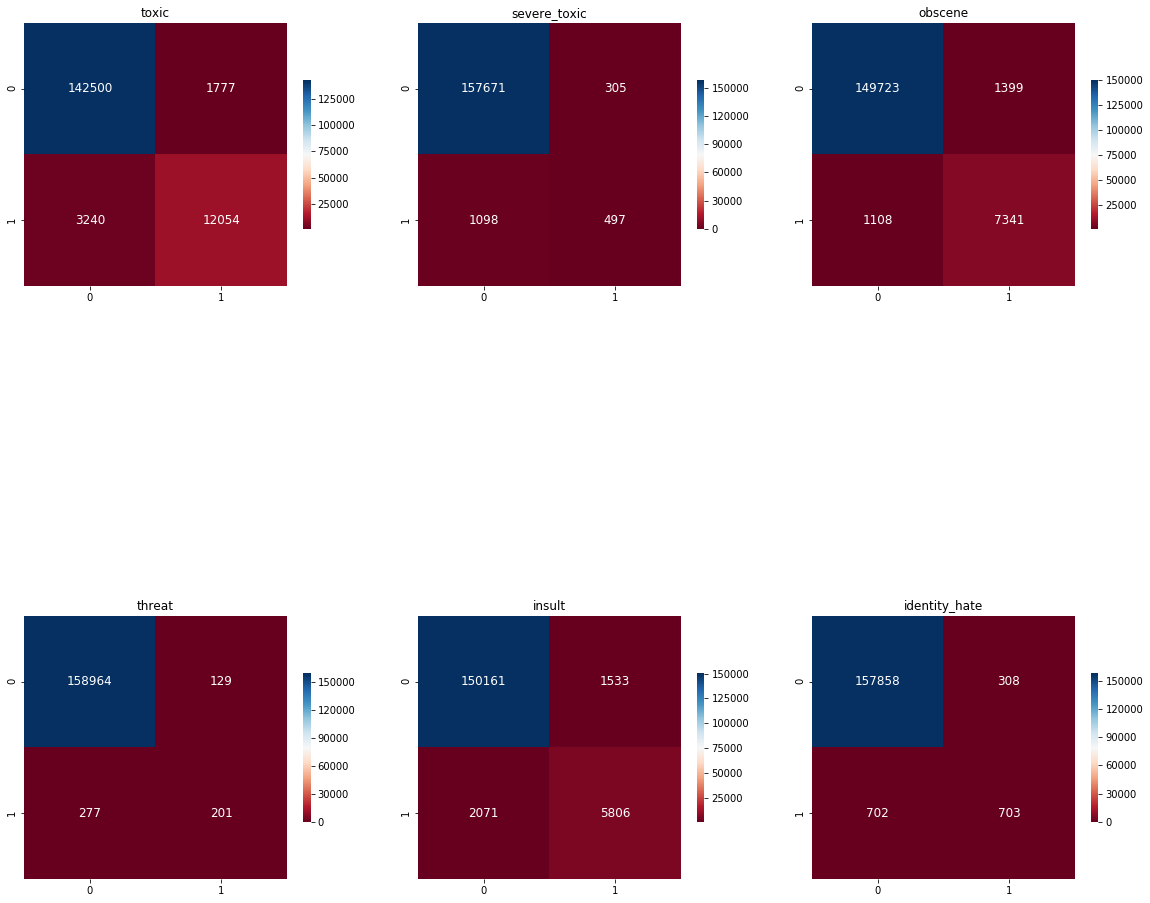

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20)) # width x height
ax1 = fig.add_subplot(2, 3, 1) # row, column, position
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]

colormap = plt.cm.RdBu
for i, k in enumerate(label_names):
    ax = axes[i]
    ax.set_title(k)
    ax.set(xlabel='true', ylabel='predicted')
    sns.heatmap(data=cm[i], ax=ax, cmap = colormap,  fmt='g', square=True ,linecolor='white', cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
